In [7]:
import numpy as np #Imorting needed libaries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler #importing linear regression library for the plot  
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("data_3dprinter.csv") #importing the dataset 
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True) #renaming the column 

if 'infill_pattern' in df.columns:  #encoding the data 
    df['infill_pattern_encoded'] = df['infill_pattern'].map({'grid': 0, 'honeycomb': 1})
if 'material' in df.columns:
    df['material_encoded'] = df['material'].map({'abs': 0, 'pla': 1})

df.drop(columns=['material', 'infill_pattern'], inplace=True) #dropping the columns that are not encoded 


For the fairness of the comparison the same rndom state value is used as with the models implemented with the library, random state = 32. Andd the same test and train split is used, as it was stated in the CW requirenment, it is 80% training set and 20% testing set. 

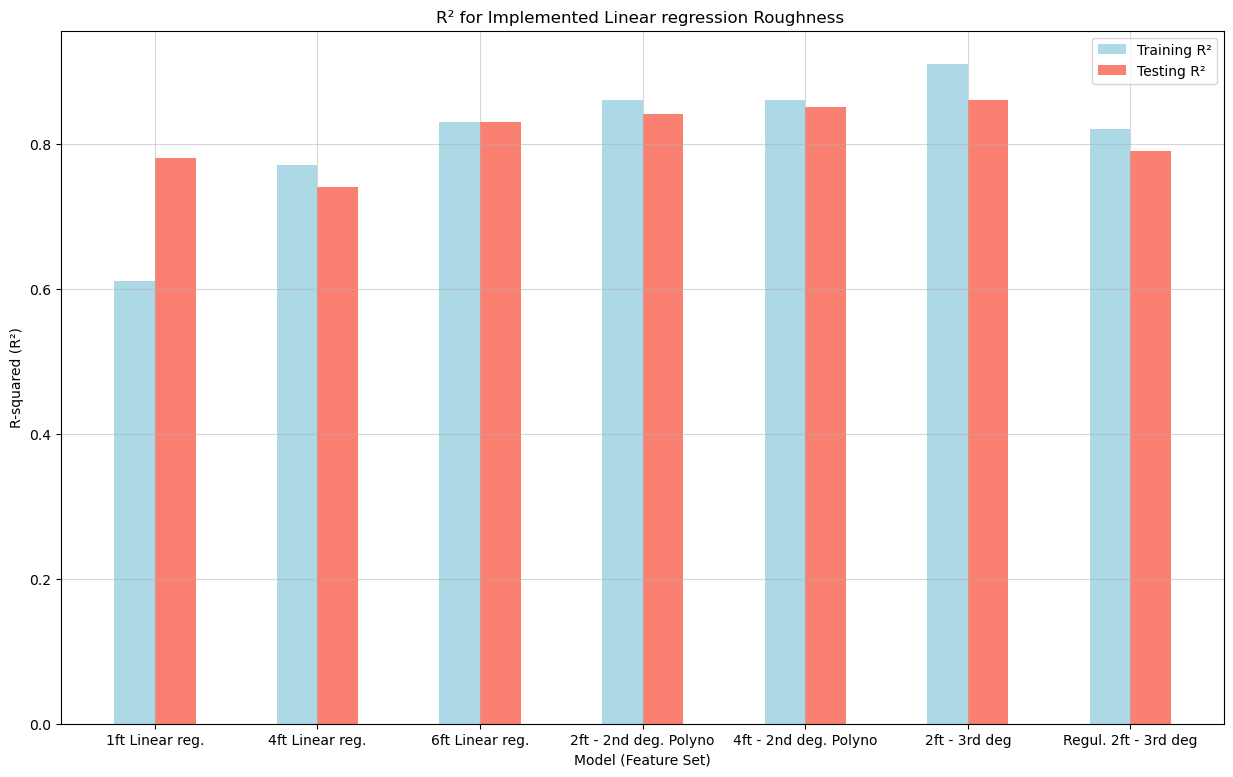

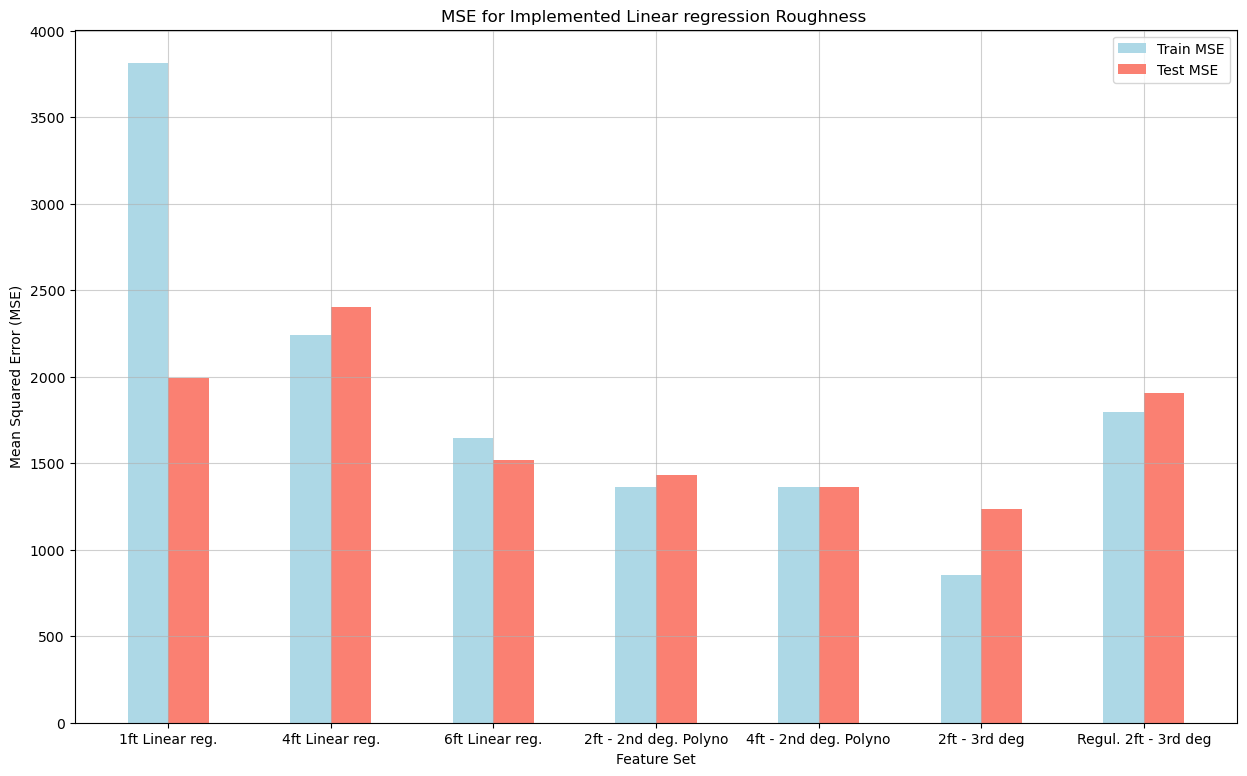

In [10]:
#Correation values for all the models 
r2_data = {
    "Model": [ "1ft Linear reg.", "4ft Linear reg.", "6ft Linear reg.",  "2ft - 2nd deg. Polyno",  "4ft - 2nd deg. Polyno", "2ft - 3rd deg", "Regul. 2ft - 3rd deg"],
    "Degree": [ 2, 2, 2, 2, 2, 2, 2 ],
    "Train R2": [ 0.61, 0.77, 0.83, 0.86, 0.86, 0.91, 0.82],  
    "Test R2":  [ 0.78, 0.74, 0.83, 0.84, 0.85, 0.86, 0.79] } 

r2_df = pd.DataFrame(r2_data)#Making the above in[uted R^2 values as dataframes

x_labels = r2_df["Model"].values
x = np.arange(len(x_labels))
width = 0.25

plt.figure(figsize=(15, 9))
plt.bar(x - width/2, r2_df["Train R2"], width, label='Training R²', color='lightblue')
plt.bar(x + width/2, r2_df["Test R2"], width, label='Testing R²', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Model (Feature Set)")
plt.ylabel("R-squared (R²)")
plt.title("R² for Implemented Linear regression Roughness ")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

data = {
    "Model": [ "1ft Linear reg.", "4ft Linear reg.", "6ft Linear reg.",  "2ft - 2nd deg. Polyno",  "4ft - 2nd deg. Polyno", "2ft - 3rd deg", "Regul. 2ft - 3rd deg"],
    "Degree": [ 2, 2, 2, 2, 2, 2, 2],
    "Train MSE": [ 3814, 2238, 1648, 1362, 1362, 851, 1795.8], 
    "Test MSE": [ 1994, 2401, 1518, 1431, 1362, 1234.3, 1906 ]}   

mse_df = pd.DataFrame(data)

#Plot
x_labels = mse_df["Model"].values
x = np.arange(len(x_labels))
width = 0.25

plt.figure(figsize=(15, 9))
plt.bar(x - width/2, mse_df["Train MSE"], width, label='Train MSE', color='lightblue')
plt.bar(x + width/2, mse_df["Test MSE"], width, label='Test MSE', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Feature Set")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Implemented Linear regression Roughness ")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

From the bar chart above we can visualise that: 
* 1st Model 1 feature linear regression - Underfitting -
This is clear through the big difference between the testing and training sets, therefore the model is not consistent. The model is unable to capture the complexity of the data. This is similair to the same model but implemented with the library. Both models display very similair correlation, R^2 results as well as MSE results for both training and testing sets. This implies that the model implemented without the library is consistent and the selsected hyperparameters are valid for the implementation. 

* 2nd Model 4 Features linear regression - moderately fits but underperforms - 
The implemented model shows moderate perfomance as the gap between testing and training sets for both R^2 and MSE is relatively low. The perfomance is moderate as the R^2 values could be higher and MSE values are too high. This implies that the model can potentially give the correct output, however it is not the most robust one. The model shows very similair parameters as the same model built with the library, hence the implemented model is a good implementation. 

* 3rd Model 6 features Linear - Better fit, not best - 
The model showed the same high R^2values for both the testing and the training sets, and the MSE of the data sets are almosr the same with a slight lower MSE value for the test set. This model is a very strong candidate to be the best fitting model for the dataset, but from the plot can also be seen that the model is outperformed by polynomial models. Again, the model shown very high correlation with the same model but implemented with the library, symbylising that it is a good implementation. 

* 4th Model 2nd Degree 2 features - Very good fit - 
The model showed high R^2 values for both of the sets, hovewer testing set is slightly lower, the difference is 0.86 and 0.84 and is not that significant to classify the model as an overfit. The MSE values for both of the sets are almost the same value, and are lower than in linear regression with 6 features. The implemented model showed more consistent perfmance between the sets, comparing to the model implemented with the library that showed greater MSE difference between training and testing sets. 

* 5th Model 2nd degree 4 features - Best fit - 
Shows highest correlation for both training and testing sets with the smallest difference between them. The MSE values are the smallest and the same for the both datasets. This implies that the model is the best fit, representing the data complexity consistently and without overfitting, perfoming well on the unseen data. Comparing this model with the model implemented with the library: The modl without the library does not show signs of overfitting unlike the library one. The library model shows higher r^2 values for the training set and lower MSE values for it. This means that the manually implemented gradient descent method is the best suited for modelling roughness of the dataset. 

* 6th Model 3rd Degee 2 features - Overfit- 
The model starts to show signs of overfit, as th R^ values begin to increase for the training set, and remaining the same for the testing set. This empheises that the increased complexity of the model only worsens the perfomanc. It can also be seen with the MSE values, as they increased for the both sets of data, and the testing sets showing higher MSE values, again indicating the overfit. Comparing this model to the library shows that the R^2 values for the implemented model are very slightly lower than the implemented model, however the implemented model shows a it smaller difference between training and testing sets. The MSE valus are also slightly higher for the implemented model, but the difference of the MSE parameters between the dta sets is the same. This indicated that the 3rd degree implemented model is accurate although 3rd degree model for the target roughness is an overfit. 

* 7th Model Reguralised 3rd Degee 2 features - Overfit- 
The model s not the best fit due to the differences in MSE and R^2 values between the sets. However, the effect of reguralisation seemed to worsen the model perfomance as, the MSE parameters went up for both of the data set, whereas the R^2 values, seemed to decrase. Those factors indicate that although alpha parameter was cosen to minimise the differences between training and testing sets, it is still not a good fit model for this data. It can be also een as the model with the library of the same complexity and reguaralised, shows worsened perfomance. This shows tha implemented model is good. 


The best model to represent the roughness target would be the Gradient descent 2nd degree polynomial with 4 features, and the second best is Sklearn library Linear regression with 6 features. 

The below can be seen the implemented models. 

The generated models were done by the gradient descent method, as it was taught in the lecture. The nmber of iterations and the learning rate hyperparameters were chosen that the model pefomance is optimised. And that was also judged by comparing the implemented model with the same complexity model, but with the library implementation. This was useful, as the library implementation selsects the optimal hyperparameters for the dta already. 

Linear Regression - 1 Feature -Roughness– Without Library

 Training Set:
Mean Absolute Error (MAE): 47.37
Mean Squared Error (MSE): 3814.12
Root Mean Squared Error (RMSE): 61.76
R-squared (R²): 0.61

 Testing Set:
Mean Absolute Error (MAE): 37.18
Mean Squared Error (MSE): 1994.55
Root Mean Squared Error (RMSE): 44.66
R-squared (R²): 0.78


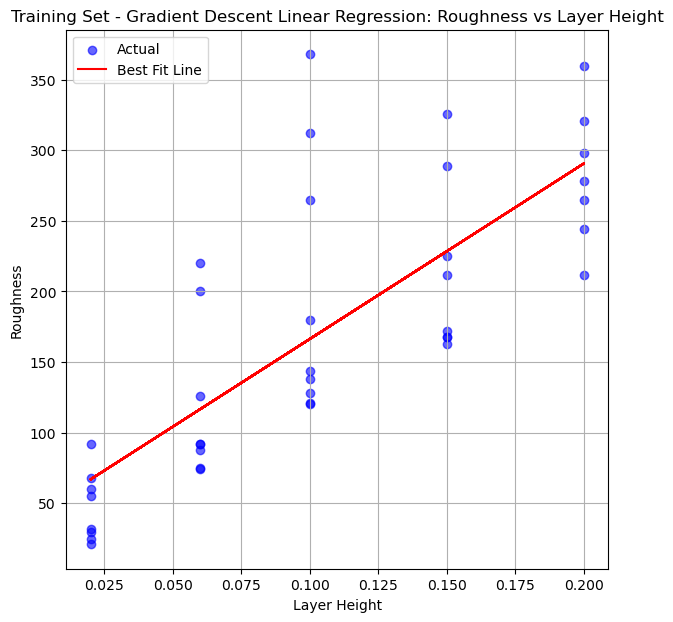

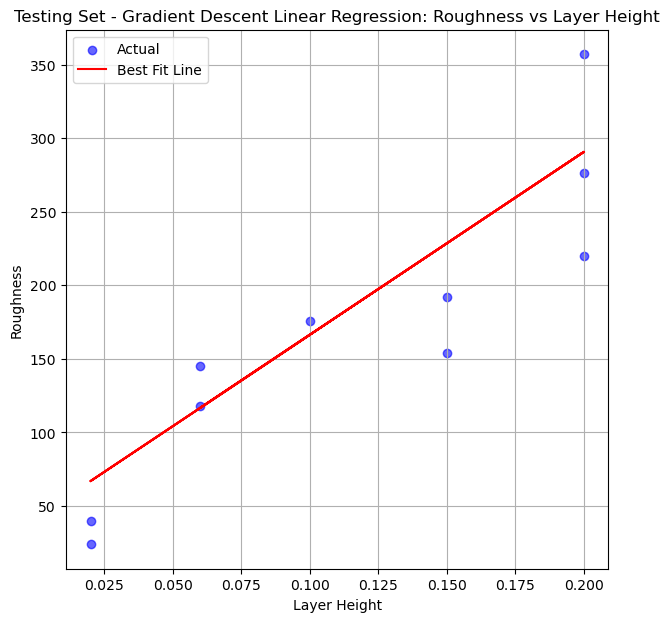

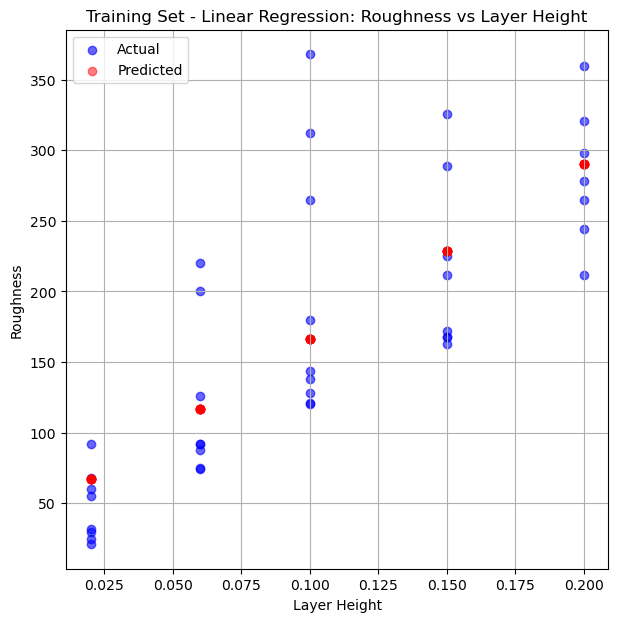

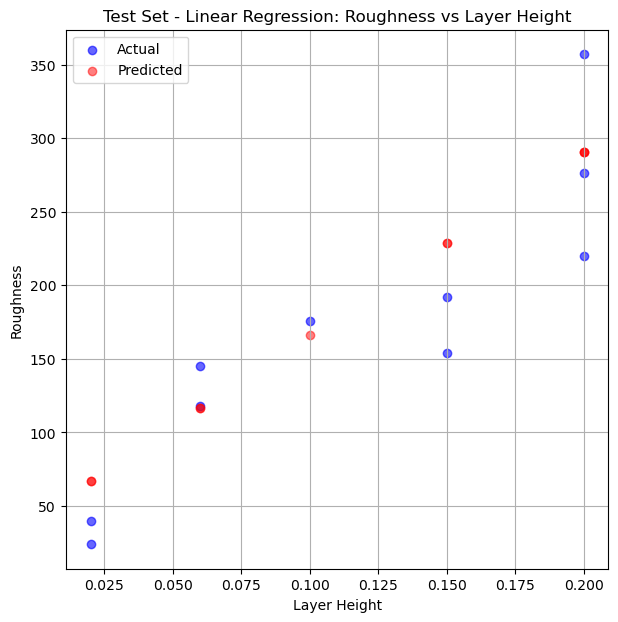

In [13]:
#Features and labels of the model 
X = df[['layer_height']].values 
y = df['roughness'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) #splitting the dataset into training and testing 

class LinearRegressionImplement: #to implement the linear regresion with gradient descent, initialising learning rate and the iterations of the model 
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations): #performing gradient descent on the stated number of iterations
            self.update_weights() #updates weights 
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)  #prdicting outputs based on weights

        dW = -2 * (self.X.T @ (self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m

        self.W = self.W - self.learning_rate * dW #updating weights 
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b  #returning the prediction 

model = LinearRegressionImplement(learning_rate=0.5, iterations=5000)# setting the number of parameters and learning rate 
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train) #modelling with prediction data
y_test_pred = model.predict(X_test)

print(f"Linear Regression - 1 Feature -Roughness– Without Library")
 #Evaluating th model perfomance of the model constucted
#Training Set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

#Testing Set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

plt.figure(figsize=(7, 7)) #displaying the figure for visualisation for training set 
plt.scatter(X_train, y_train, color='blue', label="Actual", alpha=0.6)
plt.plot(X_train, y_train_pred, color='red', label="Best Fit Line")
plt.title("Training Set - Gradient Descent Linear Regression: Roughness vs Layer Height")
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 7)) #displaying the figure for visualisation 
plt.scatter(X_test, y_test, color='blue', label="Actual", alpha=0.6)
plt.plot(X_test, y_test_pred, color='red', label="Best Fit Line")
plt.title("Testing Set - Gradient Descent Linear Regression: Roughness vs Layer Height")
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(7, 7))  # Training Set
plt.scatter(X_train[:, 0], y_train, color='blue', label="Actual", alpha=0.6)
plt.scatter(X_train[:, 0], y_train_pred, color='red', label="Predicted", alpha=0.5)
plt.title("Training Set - Linear Regression: Roughness vs Layer Height")
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 7))  # Test Set
plt.scatter(X_test[:, 0], y_test, color='blue', label="Actual", alpha=0.6)
plt.scatter(X_test[:, 0], y_test_pred, color='red', label="Predicted", alpha=0.5)
plt.title("Test Set - Linear Regression: Roughness vs Layer Height")
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.grid(True)
plt.show()




 Linear Regression - 4 Features – Without Library

 Training Set:
Mean Absolute Error (MAE): 38.94
Mean Squared Error (MSE): 2238.05
Root Mean Squared Error (RMSE): 47.31
R-squared (R²): 0.77

 Testing Set:
Mean Absolute Error (MAE): 42.07
Mean Squared Error (MSE): 2401.32
Root Mean Squared Error (RMSE): 49.00
R-squared (R²): 0.74


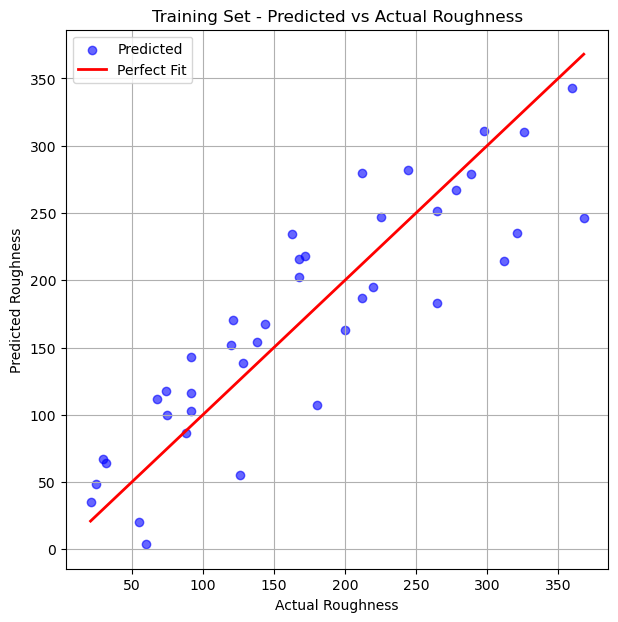

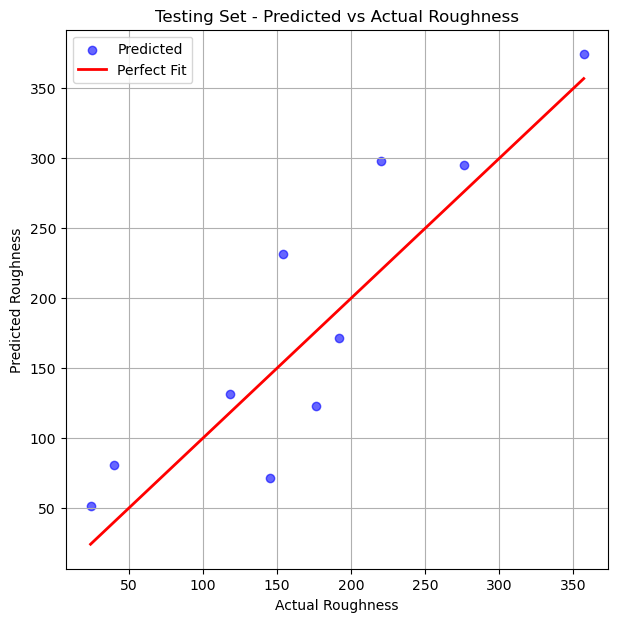

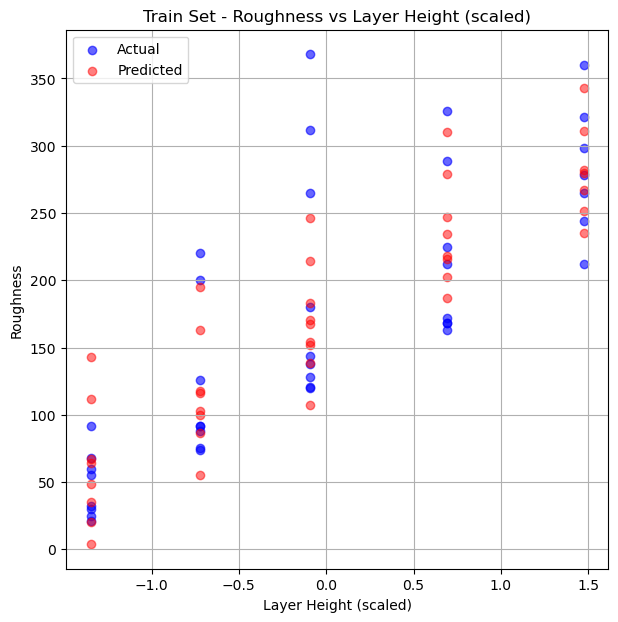

In [3]:

features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded']
X = df[features].values
y = df['roughness'].values.reshape(-1, 1)

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)


class LinearRegressionImplement:
    def __init__(self, learning_rate=0.01, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Train the model
model = LinearRegressionImplement(learning_rate=0.01, iterations=5000)
model.fit(X_train, y_train)

#Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluation
print(f"\n Linear Regression - 4 Features – Without Library")
#Training Set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

#Testing Set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

#2D Visualization – Predicted vs Actual
plt.figure(figsize=(7, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label="Predicted")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Training Set - Predicted vs Actual Roughness")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Testing Set - Predicted vs Actual Roughness")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.legend()
plt.grid(True)
plt.show()

#Feature-wise Plot
plt.figure(figsize=(7, 7))
plt.scatter(X_train[:, 0], y_train, color='blue', label="Actual", alpha=0.6)
plt.scatter(X_train[:, 0], y_train_pred, color='red', label="Predicted", alpha=0.5)
plt.title("Train Set - Roughness vs Layer Height (scaled)")
plt.xlabel("Layer Height (scaled)")
plt.ylabel("Roughness")
plt.legend()
plt.grid(True)
plt.show()




 Linear Regression - Roughness- 6 Features – Without Library

 Training Set:
Mean Absolute Error (MAE): 30.01
Mean Squared Error (MSE): 1648.96
Root Mean Squared Error (RMSE): 40.61
R-squared (R²): 0.83

 Testing Set:
Mean Absolute Error (MAE): 32.21
Mean Squared Error (MSE): 1518.30
Root Mean Squared Error (RMSE): 38.97
R-squared (R²): 0.83


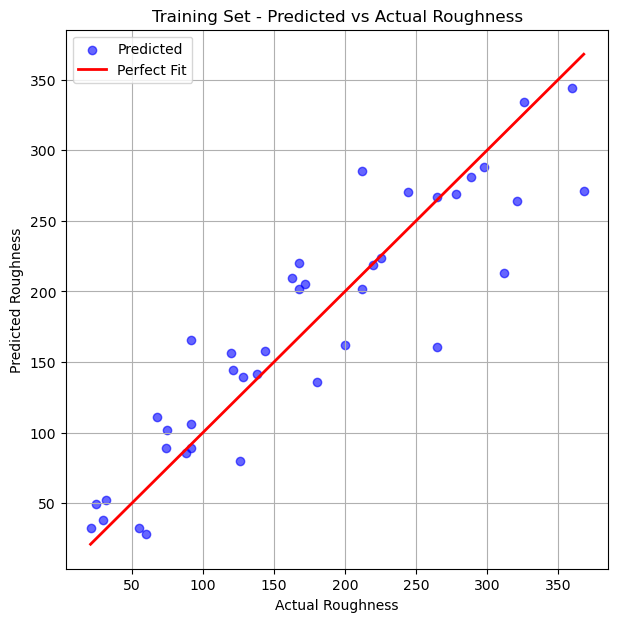

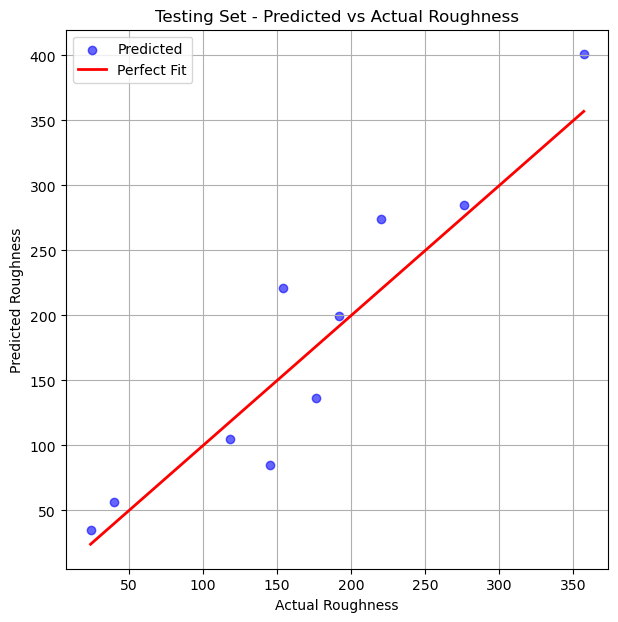

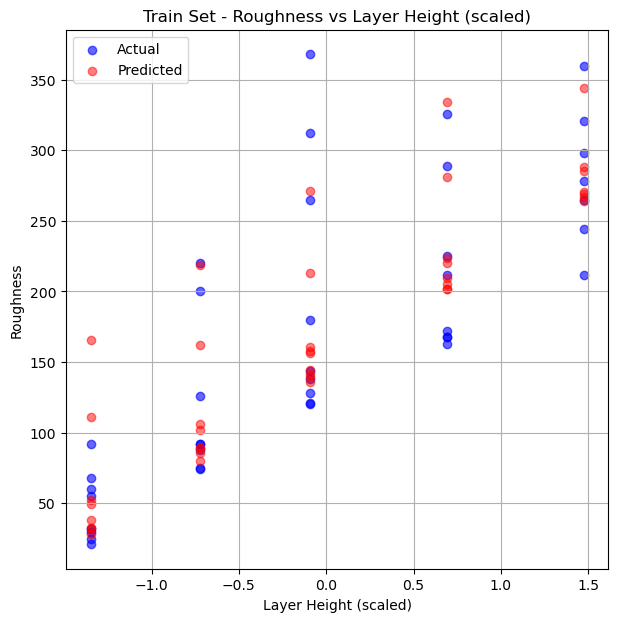

In [7]:
features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded', 'bed_temperature', 'fan_speed']
X = df[features].values
y = df['roughness'].values.reshape(-1, 1)

#Standardise features for more consise perfomance 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)


class LinearRegressionImplement:
    def __init__(self, learning_rate=0.01, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Train the model
model = LinearRegressionImplement(learning_rate=0.01, iterations=5000)
model.fit(X_train, y_train)

#Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluation
print(f"\n Linear Regression - Roughness- 6 Features – Without Library")
#Training Set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

#Testing Set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

#2D Visualization – Predicted vs Actual
plt.figure(figsize=(7, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label="Predicted")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Training Set - Predicted vs Actual Roughness")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Testing Set - Predicted vs Actual Roughness")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(X_train[:, 0], y_train, color='blue', label="Actual", alpha=0.6)
plt.scatter(X_train[:, 0], y_train_pred, color='red', label="Predicted", alpha=0.5)
plt.title("Train Set - Roughness vs Layer Height (scaled)")
plt.xlabel("Layer Height (scaled)")
plt.ylabel("Roughness")
plt.legend()
plt.grid(True)
plt.show()

Polynomial Regression 2nd Degree 2 Features - -Roughness- without library

 Training Set:
Mean Absolute Error (MAE): 28.48
Mean Squared Error (MSE): 1361.50
Root Mean Squared Error (RMSE): 36.90
R-squared (R²): 0.86

 Testing Set:
Mean Absolute Error (MAE): 28.95
Mean Squared Error (MSE): 1431.36
Root Mean Squared Error (RMSE): 37.83
R-squared (R²): 0.84


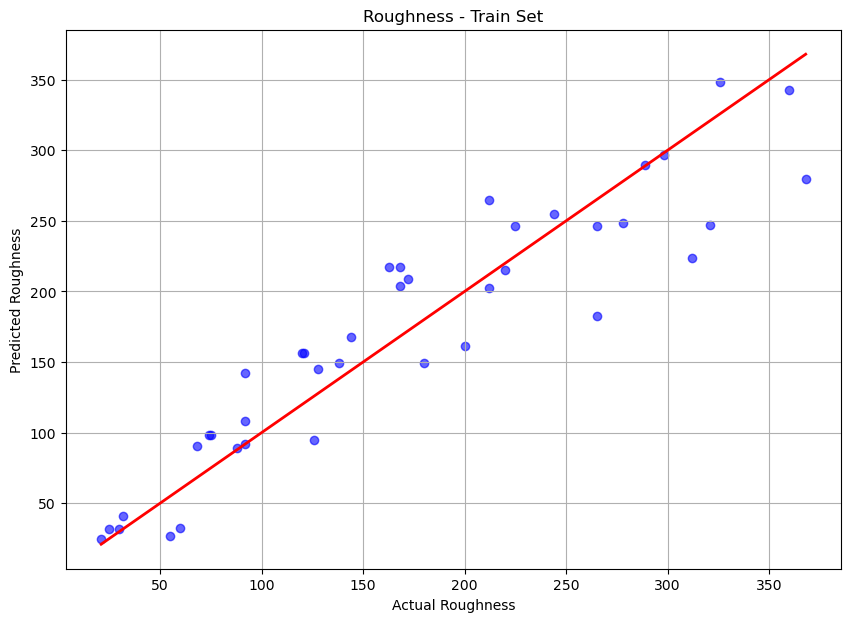

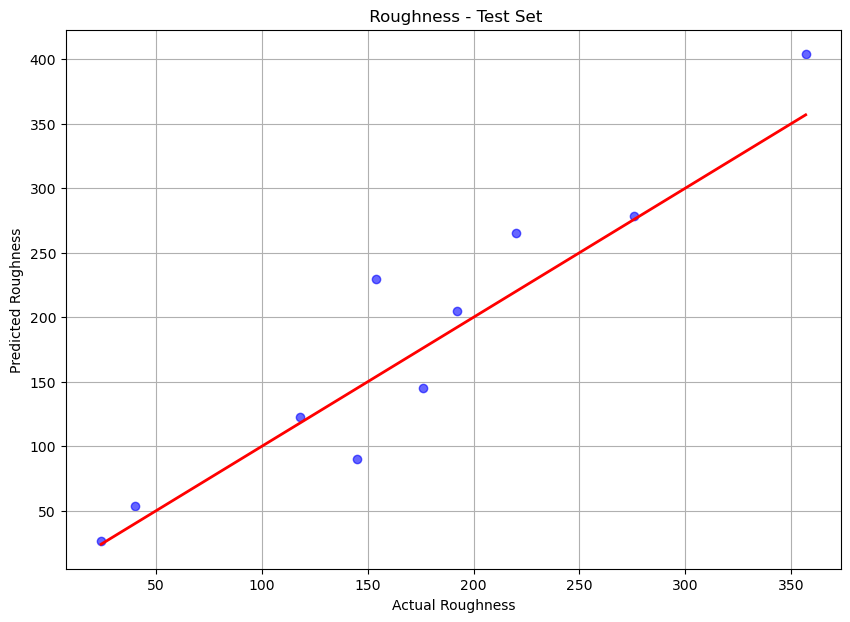

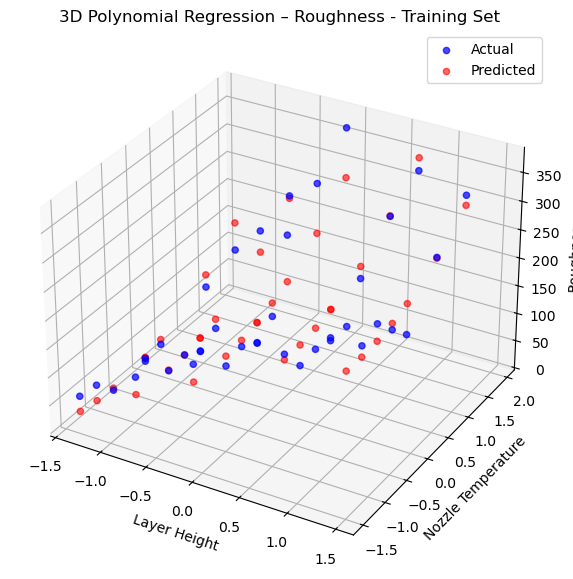

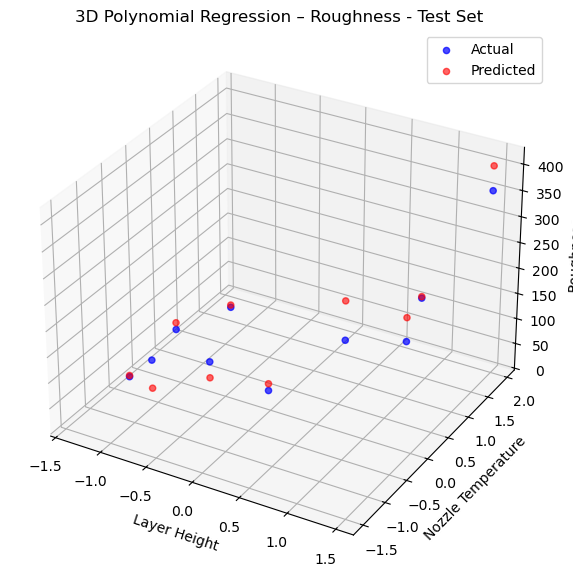

In [84]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting  features and a target/label
X = df[['layer_height', 'nozzle_temperature']].values
y = df['roughness'].values.reshape(-1, 1)

#Defining the 2nd-degree polynomial features, using layer height and nozzle temperature 
def generate_polynomial_features(X):
    x1 = X[:, 0].reshape(-1, 1)
    x2 = X[:, 1].reshape(-1, 1)
    x1_squared = x1 ** 2
    x2_squared = x2 ** 2
    x1_x2 = x1 * x2
    return np.hstack([x1, x2, x1_squared, x2_squared, x1_x2])

#Polynomial Features 
X_poly = generate_polynomial_features(X)

#Need to scale the data so graidient descend converges to the best parameter values and doesnt diverge 
X_poly = (X_poly - X_poly.mean(axis=0)) / X_poly.std(axis=0)

#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

#Linear regression by gradient descent
class PolynomialRegressionImplementation:
    def __init__(self, learning_rate=0.1, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations):
            self._gradient_descent()
        return self

    def _gradient_descent(self):
        y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - y_pred)) / self.m
        db = -2 * np.sum(self.Y - y_pred) / self.m

        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Training the model
model = PolynomialRegressionImplementation(learning_rate=0.1, iterations=6000)
model.fit(X_train, y_train)

#Generating predictions 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluation of the model perfomance 
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"Polynomial Regression 2nd Degree 2 Features - -Roughness- without library")

print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

#Testing Set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

#2D Plot for the training data set 
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue',  label="Actual", alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2, label="Perfect Fit")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Roughness - Train Set")
plt.grid(True)
plt.show()

#2D Plot for the test set 
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue',  label="Actual", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2, label="Perfect Fit")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title(" Roughness - Test Set")
plt.grid(True)
plt.show()

#3 Dplots for visualisation 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), color='blue', alpha=0.7,  label='Actual')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train_pred.flatten(), color='red', alpha=0.6, label='Predicted')
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Roughness")
ax.set_title("3D Polynomial Regression – Roughness - Training Set")
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test.flatten(), color='blue', label='Actual', alpha=0.7)
ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred.flatten(), color='red', label='Predicted', alpha=0.6)
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Roughness")
ax.set_title("3D Polynomial Regression – Roughness - Test Set")
ax.legend()
plt.show()



Polynomial Regression 2nd Degree 4 Features -Roughness- without library

 Training Set:
Mean Absolute Error (MAE): 28.48
Mean Squared Error (MSE): 1361.50
Root Mean Squared Error (RMSE): 36.90
R-squared (R²): 0.86

 Testing Set:
Mean Absolute Error (MAE): 29.82
Mean Squared Error (MSE): 1362.40
Root Mean Squared Error (RMSE): 36.91
R-squared (R²): 0.85


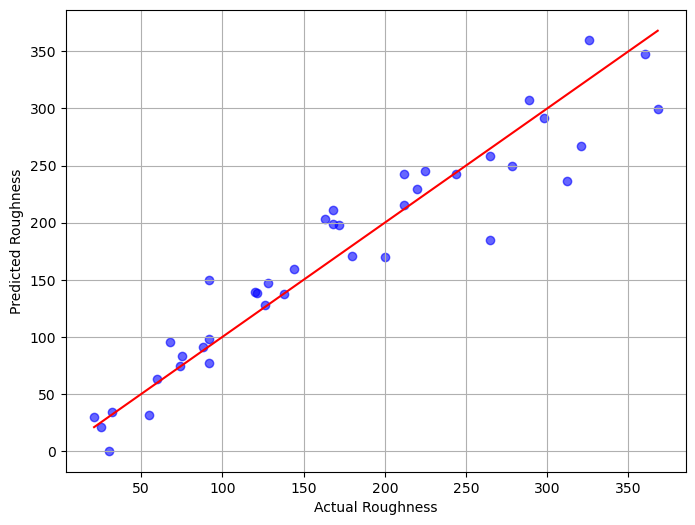

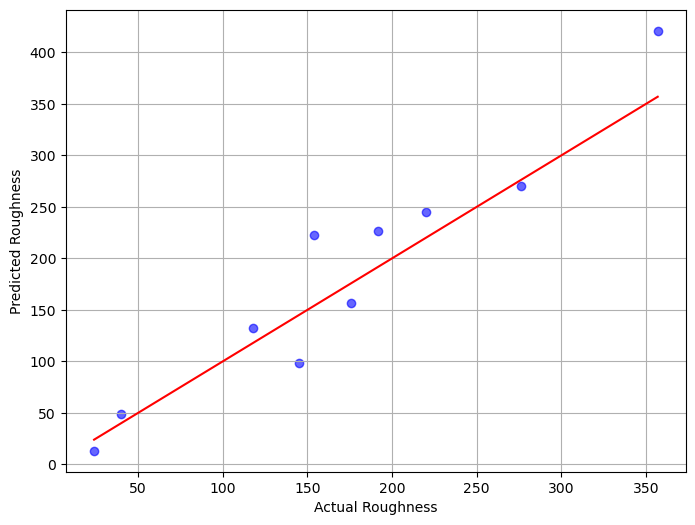

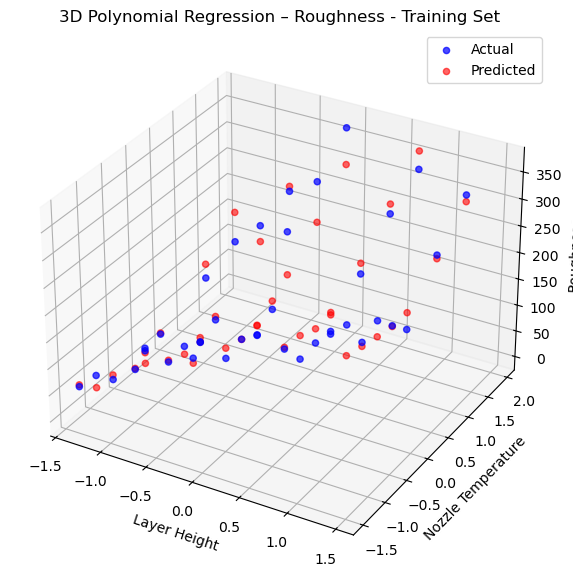

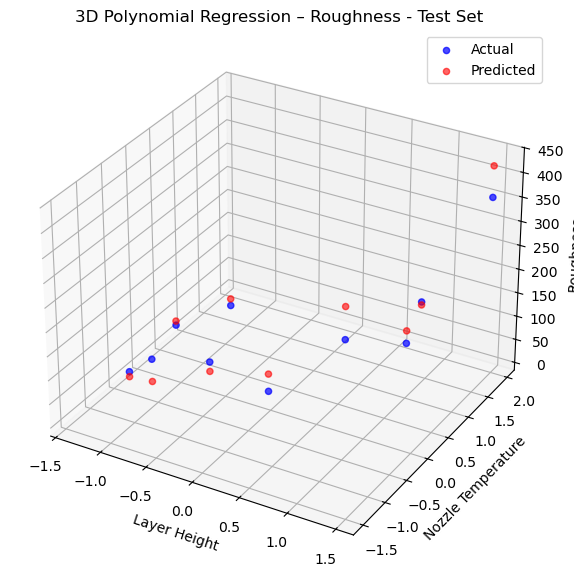

In [86]:
from mpl_toolkits.mplot3d import Axes3D
X = df[['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded']].values #all the features 
y = df['roughness'].values.reshape(-1, 1)

#2nd degree polynomial with 4 features 
def generate_polynomial_features_4f(X):
    x1 = X[:, 0].reshape(-1, 1)
    x2 = X[:, 1].reshape(-1, 1)
    x3 = X[:, 2].reshape(-1, 1)
    x4 = X[:, 3].reshape(-1, 1)

    x1_squared = x1 ** 2
    x2_squared = x2 ** 2
    x3_squared = x3 ** 2
    x4_squared = x4 ** 2

    x1_x2 = x1 * x2
    x1_x3 = x1 * x3
    x1_x4 = x1 * x4
    x2_x3 = x2 * x3
    x2_x4 = x2 * x4
    x3_x4 = x3 * x4

    return np.hstack([ x1, x2, x3, x4, x1_squared, x2_squared, x3_squared, x4_squared, x1_x2, x1_x3, x1_x4, x2_x3, x2_x4, x3_x4])

X_poly = generate_polynomial_features_4f(X)
X_poly = (X_poly - X_poly.mean(axis=0)) / X_poly.std(axis=0)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

X_raw = df[['layer_height', 'nozzle_temperature']].values #saving raw values for plotting original data 
X_train_raw = X_raw[:len(X_train)]
X_test_raw = X_raw[len(X_train):]

#2nd degree polynomial regression implementation
class PolynomialRegression:
    def __init__(self, learning_rate=0.1, iterations=6000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y
        for _ in range(self.iterations):
            self._gradient_descent()
        return self

    def _gradient_descent(self):
        y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - y_pred)) / self.m
        db = -2 * np.sum(self.Y - y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Training  the model
model = PolynomialRegression()
model.fit(X_train, y_train)

# making the prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Polynomial Regression 2nd Degree 4 Features -Roughness- without library")
#Evaluating the model 
print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

#Testing Set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


#2D Plot for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
ax.set_title("3D Polynomial Regression 4 features – Roughness - Training Set")
plt.grid(True)
plt.show()

#2D Plot for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
ax.set_title("3D Polynomial Regression 4 features – Roughness - Testing Set")
plt.grid(True)
plt.show()

# 3D Plot for Training Set
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), color='blue', alpha=0.7, label='Actual')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train_pred.flatten(), color='red', alpha=0.6, label='Predicted')
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Roughness")
ax.set_title("3D Polynomial Regression – Roughness - Training Set")
ax.legend()
plt.show()

# 3D Plot for Testing Set
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test.flatten(), color='blue', alpha=0.7, label='Actual')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred.flatten(), color='red', alpha=0.6, label='Predicted')
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Roughness")
ax.set_title("3D Polynomial Regression – Roughness - Test Set")
ax.legend()
plt.show()



The 2nd degree 4 features manually implemented polynomial regression, shows very consistent values for training and testing sets.with R^2 values of 0.86 and 0.85 for testing. The evaluation errors of the model are almost identical for the training and testing sets. This implies that the model is roboust and has strong correlation in predicting the data. The MSE errors are almost identical for the model with 4 features, but there was a slight variation in the previous polynomial model with 2 features. This emphasis that 4 feature model is the best fit for this dataset and gives the best perfomance and predictivity. The model is a good fit, and not overfit. 

3rd Degree Polynomial Regression – Roughness 2 features 

Training Set:

 Training Set:
Mean Absolute Error (MAE): 21.94
Mean Squared Error (MSE): 851.04
Root Mean Squared Error (RMSE): 29.17
R-squared (R²): 0.91

 Testing Set:
Mean Absolute Error (MAE): 27.06
Mean Squared Error (MSE): 1234.37
Root Mean Squared Error (RMSE): 35.13
R-squared (R²): 0.86


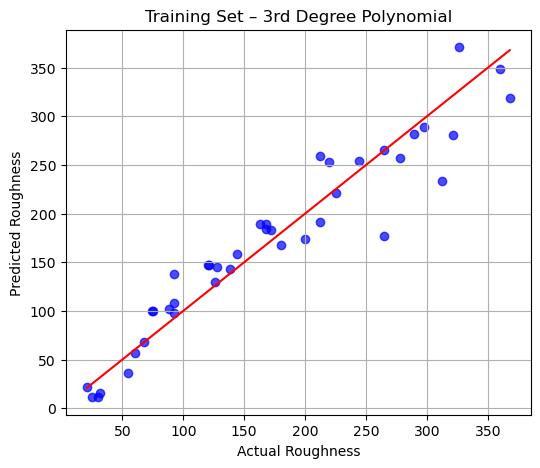

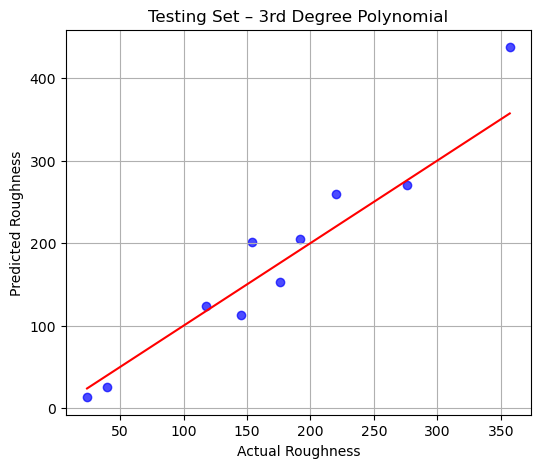

In [17]:

X = df[['layer_height', 'nozzle_temperature']].values
y = df['roughness'].values.reshape(-1, 1)

#generating 3rd-degree polynomial features
def generate_polynomial_features_2f_deg3(X):
    x1 = X[:, 0:1]
    x2 = X[:, 1:2]
    return np.hstack([
        x1, x2,                      #degree 1
        x1**2, x2**2, x1 * x2,       #degree 2
        x1**3, x2**3, x1**2 * x2, x1 * x2**2 ])#degree 3 

X_poly = generate_polynomial_features_2f_deg3(X)
X_poly = (X_poly - X_poly.mean(axis=0)) / X_poly.std(axis=0)  #normalization

#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

#implementing manual regression model 
class PolynomialRegressionDeg3:
    def __init__(self, learning_rate=0.1, iterations=6000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y
        for _ in range(self.iterations):
            self._gradient_descent()

    def _gradient_descent(self):
        y_pred = self.predict(self.X)
        dW = -2 * self.X.T @ (self.Y - y_pred) / self.m
        db = -2 * np.sum(self.Y - y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#traininig and predicting
model = PolynomialRegressionDeg3()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#model evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#prrinting results
print("3rd Degree Polynomial Regression – Roughness 2 features ")
print("\nTraining Set:")

print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")



#2D plots
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Training Set – 3rd Degree Polynomial")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Testing Set – 3rd Degree Polynomial")
plt.grid(True)
plt.show()


The model shows overfitting properties, so model with manual regularisation, ridge was implememnted below. 

3rd Degree Reguralised Polynomial Regression – Roughness 2 features 

Training Set:

 Training Set:
Mean Absolute Error (MAE): 34.53
Mean Squared Error (MSE): 1795.84
Root Mean Squared Error (RMSE): 42.38
R-squared (R²): 0.82

 Testing Set:
Mean Absolute Error (MAE): 36.91
Mean Squared Error (MSE): 1906.07
Root Mean Squared Error (RMSE): 43.66
R-squared (R²): 0.79


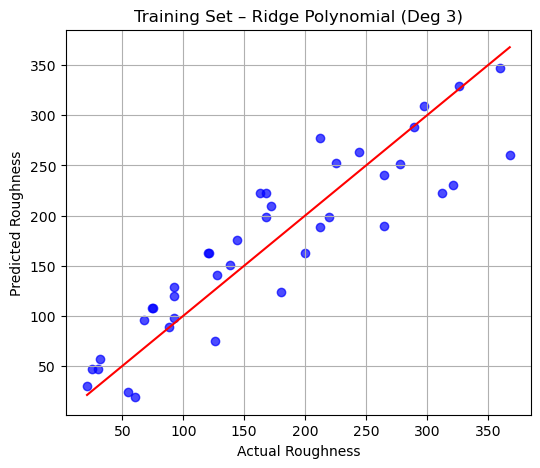

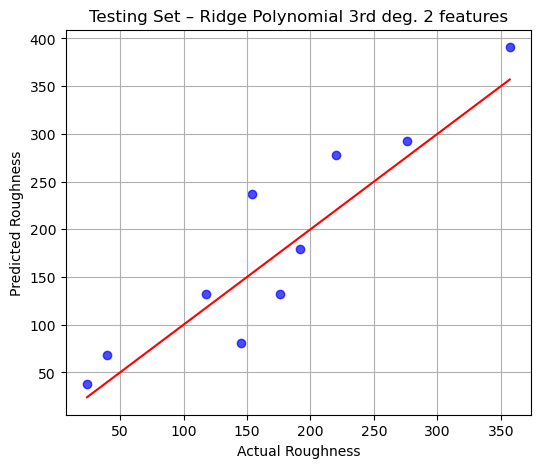

In [19]:
#generating 3rd-degree polynomial features
def generate_polynomial_features_2f_deg3(X):
    x1 = X[:, 0:1]
    x2 = X[:, 1:2]
    return np.hstack([
        x1, x2,                        #degree 1
        x1**2, x2**2, x1 * x2,         #degree 2
        x1**3, x2**3, x1**2 * x2, x1 * x2**2 ])   #degree 3

X_poly = generate_polynomial_features_2f_deg3(X)
X_poly = (X_poly - X_poly.mean(axis=0)) / X_poly.std(axis=0)  #normalization

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

#Ridge Polynomial Regression 
class RidgePolynomialRegressionDeg3:
    def __init__(self, learning_rate=0.1, iterations=6000, alpha=0.5):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y
        for _ in range(self.iterations):
            self._gradient_descent()

    def _gradient_descent(self):
        y_pred = self.predict(self.X)
        dW = (-2 * self.X.T @ (self.Y - y_pred) + 2 * self.alpha * self.W) / self.m
        db = -2 * np.sum(self.Y - y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Traininig model
model = RidgePolynomialRegressionDeg3(alpha=0.5)
model.fit(X_train, y_train)

#Predicting
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluate
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
#prrinting results
print("3rd Degree Reguralised Polynomial Regression – Roughness 2 features ")
print("\nTraining Set:")

print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

#Plotting results
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Training Set – Ridge Polynomial (Deg 3)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Testing Set – Ridge Polynomial 3rd deg. 2 features")
plt.grid(True)
plt.show()


See the conclusions and evaluations about the model above in the notebook 